#step 1 load and understand the Dataset

In [24]:
import pandas as pd

#load dataset
data_frame=pd.read_csv('Superstore.csv',encoding='ISO-8859-1')

#display first 5 rows
data_frame.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [25]:
#check for missing value
data_frame.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#check duplicate value

data_frame.duplicated().sum()

0

#step 2 clean data

Handle missing values: Remove rows with missing data or impute values if necessary.
Remove duplicate entries.
Convert data types if necessary (e.g., Order Date should be in datetime format).
Create any new columns you may need (e.g., extracting the year or month from the date).

In [38]:
#Handling Dates and Missing Values

data_frame['Order Date']=pd.to_datetime(data_frame['Order Date'])

#drop duplicate
data_frame= data_frame.drop_duplicates()

#replace null value with 0 for calculation purpose
data_frame['Sales'].fillna(0,inplace=True)
data_frame['Profit'].fillna(0, inplace=True)

Step 3 Exploratory Data Analysis (EDA)

In [39]:
#to get statistaical values we can use describe function it gives the mean, meadian, standard deviation etc on numberical data

data_frame.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [40]:
#now we can drill down to respective column to get statistical values

Sale_mean=data_frame['Sales'].mean()
Quantity_mean= data_frame['Quantity'].mean()
profit_mean= data_frame['Profit'].mean()

print("Mean of sale is ",Sale_mean, "mean of profit is ", profit_mean, "and mean of quantityt is ", Quantity_mean)

Mean of sale is  229.85800083049833 mean of profit is  28.65689630778467 and mean of quantityt is  3.789573744246548


In [41]:
Sale_median=data_frame['Sales'].median()
Quantity_median= data_frame['Quantity'].median()
profit_median= data_frame['Profit'].median()

print("Median of sale is ",Sale_median, "Median of profit is ", Quantity_median, "and Median of quantityt is ", profit_median)

Median of sale is  54.489999999999995 Median of profit is  3.0 and Median of quantityt is  8.6665


In [42]:
Sale_std=data_frame['Sales'].std()
Quantity_std= data_frame['Quantity'].std()
profit_std= data_frame['Profit'].std()

print("standard deviation of sale is ",Sale_std, "standard deviation of profit is ", Quantity_std, "and standard deviation of quantityt is ", profit_std)

standard deviation of sale is  623.2451005086818 standard deviation of profit is  2.2251096911414274 and standard deviation of quantityt is  234.26010769095757


In [45]:
sale_min= data_frame['Sales'].min()
sale_max= data_frame['Sales'].max()

profit_min=data_frame['Profit'].min()
profit_max=data_frame['Profit'].max()

print(f"Min Sales: {sale_min}, Max Sales: {sale_max}")
print(f"Min Profit: {profit_min}, Max Profit: {profit_max}")

Min Sales: 0.444, Max Sales: 22638.48
Min Profit: -6599.978, Max Profit: 8399.976


In [47]:
sale_25Per= data_frame['Sales'].quantile(0.25)
sale_50Per= data_frame['Sales'].quantile(0.50)
sale_75Per= data_frame['Sales'].quantile(0.75)


print(f"25% of sale is {sale_25Per}")
print(f"50% of sale is {sale_50Per}")
print(f"75% of sale is {sale_75Per}")

25% of sale is 17.28
50% of sale is 54.489999999999995
75% of sale is 209.94


In [52]:
#get total sale by prodcut category

category_sale= data_frame.groupby('Category')['Sales'].sum().sort_values(ascending=False)

print("Category of sale",category_sale)

#total sale of the month

data_frame['Month']=data_frame['Order Date'].dt.to_period('M')
Monthly_sales=data_frame.groupby('Month')['Sales'].sum()

#print("Monthly sale",Monthly_sales)

#top 10 selling product

top_product=data_frame.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 product are\n",top_product)

Category of sale Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64
Top 10 product are
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automati

#Step 4 Visualization

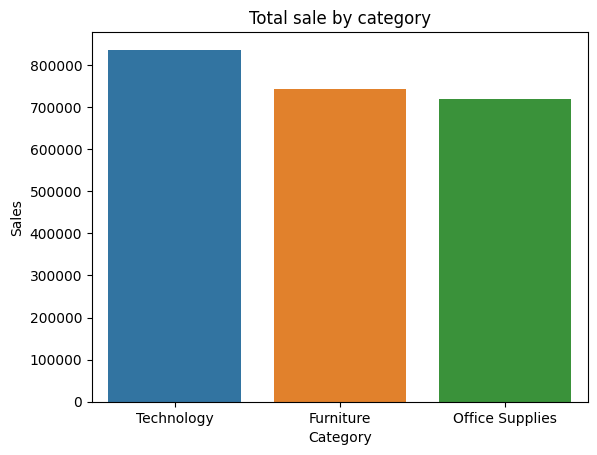

In [57]:
import matplotlib.pyplot as plt 
import seaborn as se

se.barplot(x=category_sale.index, y=category_sale.values)
plt.title('Total sale by category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()

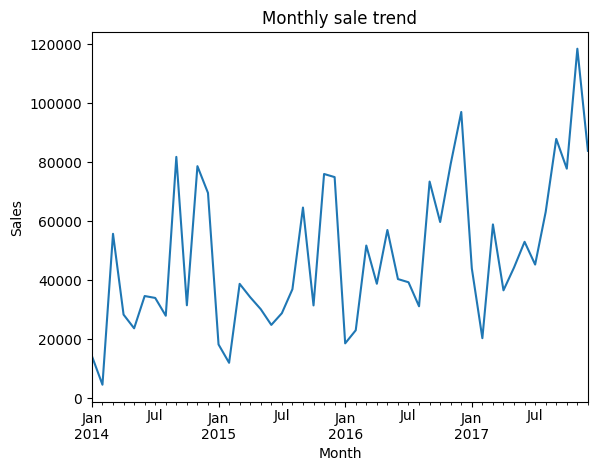

In [58]:
Monthly_sales.plot(kind='line')
plt.title('Monthly sale trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

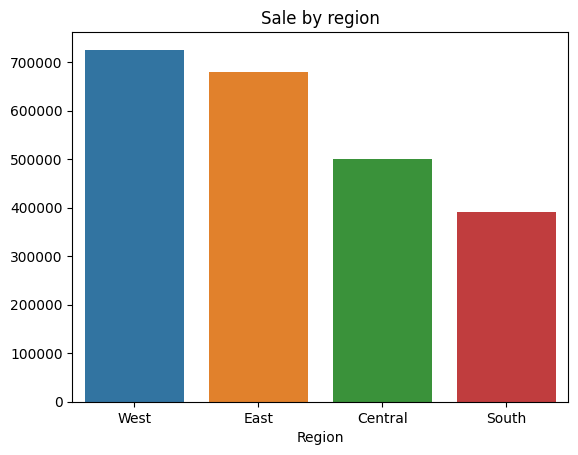

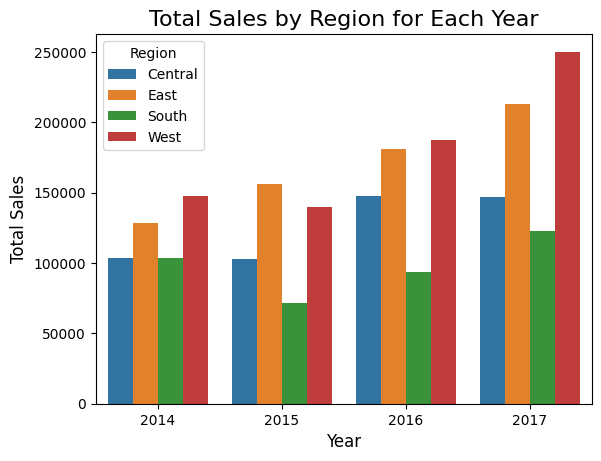

In [60]:
#sale by region

region_sale=data_frame.groupby('Region')['Sales'].sum().sort_values(ascending=False)
se.barplot(x=region_sale.index, y=region_sale.values)
plt.title('Sale by region')
plt.show()

#the sale by region for every year

data_frame['Year']=data_frame['Order Date'].dt.year

region_sale_year=data_frame.groupby(['Region','Year'])['Sales'].sum().reset_index()

#to plot a graph

se.barplot(data=region_sale_year, x='Year', y='Sales', hue='Region')
plt.title('Total Sales by Region for Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

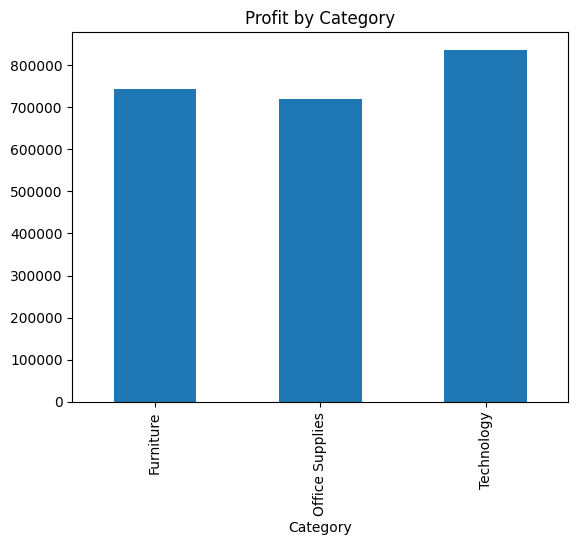

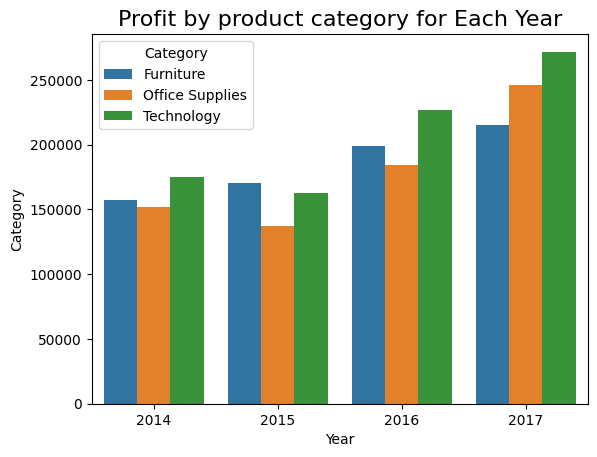

In [63]:
#Profit by product category


profit_by_category=data_frame.groupby('Category')['Sales'].sum()
profit_by_category.plot(kind='bar')
plt.title('Profit by Category')
plt.show()


#profit by product category each year

product_Profit_year=data_frame.groupby(['Category','Year'])['Sales'].sum().reset_index()

#to plot a graph
se.barplot(data=product_Profit_year, x='Year', y='Sales', hue='Category')
plt.title('Profit by product category for Each Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Category')
plt.show()

